# ClickHouse для аналитика

## MergeTree Family

### Описание задачи

Задание делится на 2 части, создание необходимой таблицы и генерация данных + вставка в таблицу.


**Часть первая:**

В данном задании вам нужно будет создать таблицу с движком MergeTree со следующими параметрами.


Поля таблицы:


    sale_date: дата продажи
    product_id: идентификатор продукта
    product_category: категория продукта
    sale_amount: сумма продажи (добавьте значение по умолчанию DEFAULT 0 будет заполняться при вставке данных вместо NULL, также используется в некоторых SQL запросах например toInt64OrDefault)
    sale_quantity: количество продаж
    customer_id: идентификатор покупателя (добавьте комментарий с помощью такого кода COMMENT 'идентификатор пользователя')
    store_id: идентификатор магазина
    PARTITION BY: по месяцам по полю sale_date
    ORDER BY: сначала по дате продажи, затем по идентификатору продукта и идентификатору покупателя
    
    
**Часть вторая:**

В полученную таблицу вставьте набор сгенерированных данных, скрипт генерации можете найти по данной [ссылке](https://colab.research.google.com/drive/1VBsp5BYZeyAlh_VT_lb4Zv3rpgholv1r?usp=sharing). Чтобы вставить данные используйте такой код

    INSERT INTO <your_table_name>
    FORMAT JSONEachRow
    [{json_data}]
    
    
Далее посчитайте сумму по полю sale_amount это и будет ответ. На следующем шаге нужно будет прислать код вашего решения.

### Создание таблицы

    CREATE TABLE my_table(
        sale_date Date,
        product_id Int64,
        product_category String,
        sale_amount Int64 DEFAULT 0,
        sale_quantity Int64,
        customer_id Int64 COMMENT 'идентификатор пользователя',
        store_id Int64
    )
      ENGINE = MergeTree()
      PARTITION BY toYYYYMM(sale_date)
      ORDER BY (sale_date, product_id, customer_id)

### Генерация данных

Скрипт генерации случайных данных (получен по ссылке из задания):

In [1]:
# Функция генерации даты
from random import randrange, sample
from datetime import timedelta, datetime

import random

random.seed(42)

def random_date(start, end):
    """
    This function will return a random datetime between two datetime
    objects.
    """
    delta = end - start
    int_delta = (delta.days * 24 * 60 * 60) + delta.seconds
    random_second = randrange(int_delta)
    return (start + timedelta(seconds=random_second)).date()


d1 = datetime.strptime('1/1/2020', '%m/%d/%Y')
d2 = datetime.strptime('1/30/2020', '%m/%d/%Y')

# Код генерации данных
import json
import random
import string
import datetime

data = []
for i in range(100):
    item = {
        "sale_date": str(random_date(d1, d2)),
        "product_id": int(random.uniform(0, 1) * 100),
        "product_category": sample(['pr1', 'pr2', 'pr3'], 1)[0],
        "sale_amount": int(random.uniform(0, 1) * 100),
        "sale_quantity": int(random.uniform(0, 1) * 100),
        "customer_id": int(random.uniform(0, 1) * 100),
        "store_id": int(random.uniform(0, 1) * 100),
    }
    data.append(item)

json_text = json.dumps(data)
print(json_text)

[{"sale_date": "2020-01-06", "product_id": 2, "product_category": "pr2", "sale_amount": 24, "sale_quantity": 13, "customer_id": 10, "store_id": 74}, {"sale_date": "2020-01-27", "product_id": 8, "product_category": "pr2", "sale_amount": 3, "sale_quantity": 9, "customer_id": 23, "store_id": 60}, {"sale_date": "2020-01-28", "product_id": 19, "product_category": "pr3", "sale_amount": 70, "sale_quantity": 41, "customer_id": 44, "store_id": 27}, {"sale_date": "2020-01-01", "product_id": 75, "product_category": "pr1", "sale_amount": 69, "sale_quantity": 34, "customer_id": 15, "store_id": 95}, {"sale_date": "2020-01-17", "product_id": 10, "product_category": "pr2", "sale_amount": 9, "sale_quantity": 84, "customer_id": 60, "store_id": 80}, {"sale_date": "2020-01-23", "product_id": 53, "product_category": "pr2", "sale_amount": 7, "sale_quantity": 29, "customer_id": 62, "store_id": 88}, {"sale_date": "2020-01-18", "product_id": 57, "product_category": "pr3", "sale_amount": 6, "sale_quantity": 66,

### Вставка данных в таблицу

INSERT INTO my_table
FORMAT JSONEachRow
[{"sale_date": "2020-01-06", "product_id": 2, "product_category": "pr2", "sale_amount": 24, "sale_quantity": 13, "customer_id": 10, "store_id": 74}, {"sale_date": "2020-01-27", "product_id": 8, "product_category": "pr2", "sale_amount": 3, "sale_quantity": 9, "customer_id": 23, "store_id": 60}, {"sale_date": "2020-01-28", "product_id": 19, "product_category": "pr3", "sale_amount": 70, "sale_quantity": 41, "customer_id": 44, "store_id": 27}, {"sale_date": "2020-01-01", "product_id": 75, "product_category": "pr1", "sale_amount": 69, "sale_quantity": 34, "customer_id": 15, "store_id": 95}, {"sale_date": "2020-01-17", "product_id": 10, "product_category": "pr2", "sale_amount": 9, "sale_quantity": 84, "customer_id": 60, "store_id": 80}, {"sale_date": "2020-01-23", "product_id": 53, "product_category": "pr2", "sale_amount": 7, "sale_quantity": 29, "customer_id": 62, "store_id": 88}, {"sale_date": "2020-01-18", "product_id": 57, "product_category": "pr3", "sale_amount": 6, "sale_quantity": 66, "customer_id": 77, "store_id": 98}, {"sale_date": "2020-01-12", "product_id": 86, "product_category": "pr2", "sale_amount": 27, "sale_quantity": 63, "customer_id": 36, "store_id": 37}, {"sale_date": "2020-01-11", "product_id": 67, "product_category": "pr3", "sale_amount": 93, "sale_quantity": 64, "customer_id": 60, "store_id": 17}, {"sale_date": "2020-01-12", "product_id": 16, "product_category": "pr2", "sale_amount": 26, "sale_quantity": 92, "customer_id": 68, "store_id": 21}, {"sale_date": "2020-01-16", "product_id": 84, "product_category": "pr1", "sale_amount": 22, "sale_quantity": 3, "customer_id": 31, "store_id": 26}, {"sale_date": "2020-01-11", "product_id": 91, "product_category": "pr3", "sale_amount": 87, "sale_quantity": 31, "customer_id": 65, "store_id": 39}, {"sale_date": "2020-01-23", "product_id": 14, "product_category": "pr1", "sale_amount": 24, "sale_quantity": 56, "customer_id": 26, "store_id": 58}, {"sale_date": "2020-01-29", "product_id": 39, "product_category": "pr1", "sale_amount": 99, "sale_quantity": 13, "customer_id": 49, "store_id": 75}, {"sale_date": "2020-01-06", "product_id": 15, "product_category": "pr1", "sale_amount": 79, "sale_quantity": 42, "customer_id": 6, "store_id": 38}, {"sale_date": "2020-01-23", "product_id": 52, "product_category": "pr3", "sale_amount": 86, "sale_quantity": 1, "customer_id": 72, "store_id": 68}, {"sale_date": "2020-01-27", "product_id": 75, "product_category": "pr3", "sale_amount": 34, "sale_quantity": 29, "customer_id": 15, "store_id": 0}, {"sale_date": "2020-01-13", "product_id": 97, "product_category": "pr1", "sale_amount": 50, "sale_quantity": 10, "customer_id": 62, "store_id": 84}, {"sale_date": "2020-01-25", "product_id": 60, "product_category": "pr1", "sale_amount": 37, "sale_quantity": 16, "customer_id": 95, "store_id": 92}, {"sale_date": "2020-01-01", "product_id": 59, "product_category": "pr2", "sale_amount": 1, "sale_quantity": 92, "customer_id": 87, "store_id": 83}, {"sale_date": "2020-01-15", "product_id": 23, "product_category": "pr1", "sale_amount": 87, "sale_quantity": 94, "customer_id": 8, "store_id": 48}, {"sale_date": "2020-01-04", "product_id": 97, "product_category": "pr3", "sale_amount": 76, "sale_quantity": 12, "customer_id": 47, "store_id": 54}, {"sale_date": "2020-01-13", "product_id": 52, "product_category": "pr3", "sale_amount": 42, "sale_quantity": 21, "customer_id": 53, "store_id": 72}, {"sale_date": "2020-01-10", "product_id": 71, "product_category": "pr2", "sale_amount": 99, "sale_quantity": 64, "customer_id": 43, "store_id": 51}, {"sale_date": "2020-01-06", "product_id": 24, "product_category": "pr1", "sale_amount": 33, "sale_quantity": 58, "customer_id": 23, "store_id": 22}, {"sale_date": "2020-01-04", "product_id": 70, "product_category": "pr1", "sale_amount": 22, "sale_quantity": 90, "customer_id": 85, "store_id": 7}, {"sale_date": "2020-01-12", "product_id": 27, "product_category": "pr2", "sale_amount": 21, "sale_quantity": 13, "customer_id": 93, "store_id": 57}, {"sale_date": "2020-01-23", "product_id": 24, "product_category": "pr2", "sale_amount": 80, "sale_quantity": 19, "customer_id": 9, "store_id": 43}, {"sale_date": "2020-01-21", "product_id": 41, "product_category": "pr3", "sale_amount": 5, "sale_quantity": 65, "customer_id": 64, "store_id": 6}, {"sale_date": "2020-01-17", "product_id": 80, "product_category": "pr1", "sale_amount": 24, "sale_quantity": 19, "customer_id": 44, "store_id": 42}, {"sale_date": "2020-01-14", "product_id": 46, "product_category": "pr1", "sale_amount": 44, "sale_quantity": 86, "customer_id": 55, "store_id": 5}, {"sale_date": "2020-01-27", "product_id": 83, "product_category": "pr1", "sale_amount": 92, "sale_quantity": 84, "customer_id": 16, "store_id": 48}, {"sale_date": "2020-01-11", "product_id": 86, "product_category": "pr1", "sale_amount": 16, "sale_quantity": 0, "customer_id": 39, "store_id": 92}, {"sale_date": "2020-01-23", "product_id": 28, "product_category": "pr3", "sale_amount": 95, "sale_quantity": 99, "customer_id": 55, "store_id": 71}, {"sale_date": "2020-01-08", "product_id": 18, "product_category": "pr1", "sale_amount": 96, "sale_quantity": 57, "customer_id": 54, "store_id": 74}, {"sale_date": "2020-01-03", "product_id": 5, "product_category": "pr2", "sale_amount": 50, "sale_quantity": 85, "customer_id": 15, "store_id": 96}, {"sale_date": "2020-01-04", "product_id": 85, "product_category": "pr1", "sale_amount": 59, "sale_quantity": 67, "customer_id": 23, "store_id": 11}, {"sale_date": "2020-01-28", "product_id": 24, "product_category": "pr3", "sale_amount": 3, "sale_quantity": 8, "customer_id": 65, "store_id": 56}, {"sale_date": "2020-01-16", "product_id": 93, "product_category": "pr1", "sale_amount": 66, "sale_quantity": 31, "customer_id": 26, "store_id": 13}, {"sale_date": "2020-01-15", "product_id": 45, "product_category": "pr1", "sale_amount": 0, "sale_quantity": 62, "customer_id": 56, "store_id": 9}, {"sale_date": "2020-01-27", "product_id": 21, "product_category": "pr2", "sale_amount": 13, "sale_quantity": 34, "customer_id": 6, "store_id": 24}, {"sale_date": "2020-01-14", "product_id": 15, "product_category": "pr3", "sale_amount": 70, "sale_quantity": 61, "customer_id": 98, "store_id": 65}, {"sale_date": "2020-01-01", "product_id": 66, "product_category": "pr3", "sale_amount": 29, "sale_quantity": 66, "customer_id": 93, "store_id": 13}, {"sale_date": "2020-01-06", "product_id": 88, "product_category": "pr3", "sale_amount": 55, "sale_quantity": 27, "customer_id": 60, "store_id": 71}, {"sale_date": "2020-01-10", "product_id": 68, "product_category": "pr2", "sale_amount": 50, "sale_quantity": 25, "customer_id": 90, "store_id": 5}, {"sale_date": "2020-01-21", "product_id": 82, "product_category": "pr1", "sale_amount": 0, "sale_quantity": 77, "customer_id": 63, "store_id": 26}, {"sale_date": "2020-01-22", "product_id": 55, "product_category": "pr2", "sale_amount": 56, "sale_quantity": 11, "customer_id": 94, "store_id": 69}, {"sale_date": "2020-01-08", "product_id": 54, "product_category": "pr2", "sale_amount": 58, "sale_quantity": 14, "customer_id": 12, "store_id": 30}, {"sale_date": "2020-01-02", "product_id": 89, "product_category": "pr1", "sale_amount": 68, "sale_quantity": 66, "customer_id": 35, "store_id": 55}, {"sale_date": "2020-01-20", "product_id": 97, "product_category": "pr3", "sale_amount": 15, "sale_quantity": 92, "customer_id": 86, "store_id": 97}, {"sale_date": "2020-01-09", "product_id": 88, "product_category": "pr1", "sale_amount": 17, "sale_quantity": 92, "customer_id": 78, "store_id": 41}, {"sale_date": "2020-01-13", "product_id": 26, "product_category": "pr3", "sale_amount": 10, "sale_quantity": 87, "customer_id": 85, "store_id": 22}, {"sale_date": "2020-01-23", "product_id": 34, "product_category": "pr1", "sale_amount": 22, "sale_quantity": 66, "customer_id": 39, "store_id": 27}, {"sale_date": "2020-01-04", "product_id": 96, "product_category": "pr2", "sale_amount": 35, "sale_quantity": 50, "customer_id": 67, "store_id": 84}, {"sale_date": "2020-01-17", "product_id": 93, "product_category": "pr1", "sale_amount": 87, "sale_quantity": 26, "customer_id": 58, "store_id": 98}, {"sale_date": "2020-01-02", "product_id": 10, "product_category": "pr2", "sale_amount": 34, "sale_quantity": 78, "customer_id": 43, "store_id": 98}, {"sale_date": "2020-01-06", "product_id": 38, "product_category": "pr3", "sale_amount": 19, "sale_quantity": 4, "customer_id": 43, "store_id": 51}, {"sale_date": "2020-01-27", "product_id": 68, "product_category": "pr3", "sale_amount": 73, "sale_quantity": 19, "customer_id": 43, "store_id": 94}, {"sale_date": "2020-01-17", "product_id": 62, "product_category": "pr3", "sale_amount": 84, "sale_quantity": 71, "customer_id": 30, "store_id": 30}, {"sale_date": "2020-01-20", "product_id": 32, "product_category": "pr3", "sale_amount": 29, "sale_quantity": 12, "customer_id": 42, "store_id": 94}, {"sale_date": "2020-01-09", "product_id": 61, "product_category": "pr2", "sale_amount": 40, "sale_quantity": 83, "customer_id": 30, "store_id": 21}, {"sale_date": "2020-01-29", "product_id": 60, "product_category": "pr2", "sale_amount": 46, "sale_quantity": 44, "customer_id": 21, "store_id": 47}, {"sale_date": "2020-01-09", "product_id": 65, "product_category": "pr2", "sale_amount": 51, "sale_quantity": 63, "customer_id": 33, "store_id": 81}, {"sale_date": "2020-01-12", "product_id": 67, "product_category": "pr1", "sale_amount": 80, "sale_quantity": 14, "customer_id": 4, "store_id": 98}, {"sale_date": "2020-01-04", "product_id": 45, "product_category": "pr3", "sale_amount": 57, "sale_quantity": 71, "customer_id": 38, "store_id": 39}, {"sale_date": "2020-01-08", "product_id": 65, "product_category": "pr1", "sale_amount": 89, "sale_quantity": 86, "customer_id": 88, "store_id": 77}, {"sale_date": "2020-01-11", "product_id": 17, "product_category": "pr3", "sale_amount": 51, "sale_quantity": 5, "customer_id": 24, "store_id": 84}, {"sale_date": "2020-01-23", "product_id": 13, "product_category": "pr2", "sale_amount": 66, "sale_quantity": 98, "customer_id": 59, "store_id": 95}, {"sale_date": "2020-01-22", "product_id": 61, "product_category": "pr3", "sale_amount": 89, "sale_quantity": 42, "customer_id": 90, "store_id": 44}, {"sale_date": "2020-01-08", "product_id": 74, "product_category": "pr2", "sale_amount": 45, "sale_quantity": 75, "customer_id": 83, "store_id": 27}, {"sale_date": "2020-01-26", "product_id": 48, "product_category": "pr1", "sale_amount": 27, "sale_quantity": 7, "customer_id": 28, "store_id": 27}, {"sale_date": "2020-01-16", "product_id": 89, "product_category": "pr1", "sale_amount": 13, "sale_quantity": 23, "customer_id": 69, "store_id": 70}, {"sale_date": "2020-01-04", "product_id": 41, "product_category": "pr2", "sale_amount": 54, "sale_quantity": 41, "customer_id": 20, "store_id": 42}, {"sale_date": "2020-01-29", "product_id": 94, "product_category": "pr1", "sale_amount": 85, "sale_quantity": 76, "customer_id": 38, "store_id": 0}, {"sale_date": "2020-01-18", "product_id": 29, "product_category": "pr2", "sale_amount": 85, "sale_quantity": 95, "customer_id": 41, "store_id": 74}, {"sale_date": "2020-01-27", "product_id": 79, "product_category": "pr1", "sale_amount": 48, "sale_quantity": 27, "customer_id": 48, "store_id": 38}, {"sale_date": "2020-01-20", "product_id": 72, "product_category": "pr2", "sale_amount": 91, "sale_quantity": 98, "customer_id": 53, "store_id": 90}, {"sale_date": "2020-01-29", "product_id": 56, "product_category": "pr1", "sale_amount": 8, "sale_quantity": 42, "customer_id": 86, "store_id": 18}, {"sale_date": "2020-01-13", "product_id": 37, "product_category": "pr1", "sale_amount": 45, "sale_quantity": 33, "customer_id": 87, "store_id": 27}, {"sale_date": "2020-01-21", "product_id": 25, "product_category": "pr1", "sale_amount": 47, "sale_quantity": 74, "customer_id": 5, "store_id": 95}, {"sale_date": "2020-01-11", "product_id": 65, "product_category": "pr3", "sale_amount": 4, "sale_quantity": 3, "customer_id": 24, "store_id": 83}, {"sale_date": "2020-01-08", "product_id": 23, "product_category": "pr2", "sale_amount": 66, "sale_quantity": 56, "customer_id": 21, "store_id": 69}, {"sale_date": "2020-01-18", "product_id": 16, "product_category": "pr3", "sale_amount": 96, "sale_quantity": 71, "customer_id": 77, "store_id": 16}, {"sale_date": "2020-01-16", "product_id": 10, "product_category": "pr1", "sale_amount": 92, "sale_quantity": 57, "customer_id": 90, "store_id": 37}, {"sale_date": "2020-01-10", "product_id": 7, "product_category": "pr3", "sale_amount": 83, "sale_quantity": 24, "customer_id": 69, "store_id": 30}, {"sale_date": "2020-01-06", "product_id": 79, "product_category": "pr3", "sale_amount": 78, "sale_quantity": 34, "customer_id": 42, "store_id": 37}, {"sale_date": "2020-01-25", "product_id": 64, "product_category": "pr1", "sale_amount": 84, "sale_quantity": 82, "customer_id": 10, "store_id": 96}, {"sale_date": "2020-01-23", "product_id": 70, "product_category": "pr2", "sale_amount": 17, "sale_quantity": 52, "customer_id": 65, "store_id": 61}, {"sale_date": "2020-01-27", "product_id": 77, "product_category": "pr2", "sale_amount": 43, "sale_quantity": 73, "customer_id": 26, "store_id": 85}, {"sale_date": "2020-01-05", "product_id": 27, "product_category": "pr2", "sale_amount": 24, "sale_quantity": 46, "customer_id": 61, "store_id": 37}, {"sale_date": "2020-01-02", "product_id": 49, "product_category": "pr2", "sale_amount": 18, "sale_quantity": 21, "customer_id": 79, "store_id": 34}, {"sale_date": "2020-01-29", "product_id": 70, "product_category": "pr2", "sale_amount": 55, "sale_quantity": 51, "customer_id": 19, "store_id": 24}, {"sale_date": "2020-01-20", "product_id": 48, "product_category": "pr1", "sale_amount": 69, "sale_quantity": 64, "customer_id": 49, "store_id": 79}, {"sale_date": "2020-01-05", "product_id": 29, "product_category": "pr2", "sale_amount": 69, "sale_quantity": 30, "customer_id": 58, "store_id": 47}, {"sale_date": "2020-01-26", "product_id": 34, "product_category": "pr3", "sale_amount": 55, "sale_quantity": 35, "customer_id": 45, "store_id": 30}, {"sale_date": "2020-01-12", "product_id": 12, "product_category": "pr1", "sale_amount": 31, "sale_quantity": 74, "customer_id": 95, "store_id": 69}, {"sale_date": "2020-01-10", "product_id": 21, "product_category": "pr2", "sale_amount": 27, "sale_quantity": 58, "customer_id": 76, "store_id": 59}, {"sale_date": "2020-01-05", "product_id": 83, "product_category": "pr2", "sale_amount": 22, "sale_quantity": 17, "customer_id": 1, "store_id": 53}, {"sale_date": "2020-01-14", "product_id": 4, "product_category": "pr1", "sale_amount": 55, "sale_quantity": 69, "customer_id": 12, "store_id": 86}, {"sale_date": "2020-01-24", "product_id": 10, "product_category": "pr1", "sale_amount": 57, "sale_quantity": 46, "customer_id": 44, "store_id": 18}]

### Расчёт искомого значения

Посчитайте сумму по полю sale_amount

    SELECT SUM(sale_amount)
    FROM my_table
    
    4849

### Описание созданной таблицы

    DESCRIBE TABLE my_table

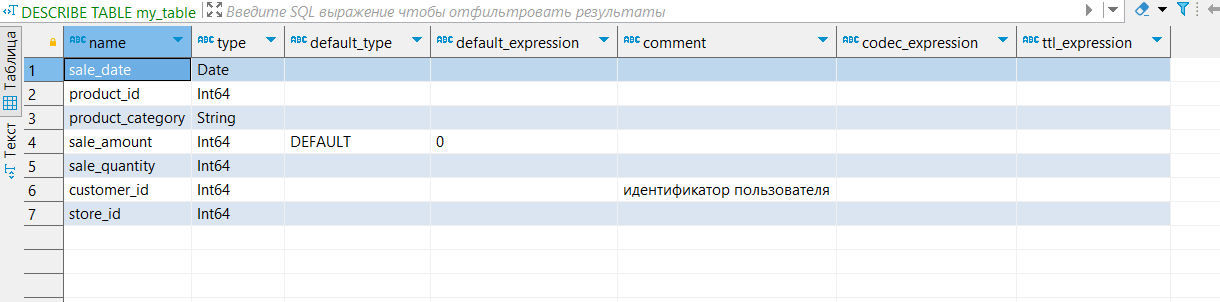

___________________________________________________________________________________________________________________________
Заметки вела: аналитик данных Малахова Наталья

Мой телеграм-канал: [Дневник аналитика](https://t.me/diary_musician_analyst "Дневник аналитика")

Портфолио: [GitHub](https://github.com/Malakhova-Natalya "GitHub")

Хабр: [Habr](https://habr.com/ru/users/Malakhova-Natalya/publications/articles/ "Habr")


Спасибо за внимание!